# ALS HD demo scene

Notebook:

This demo scene uses a digital terrain model (DTM) of Heidelberg which will be scanned by ALS. We will use the command-line access of HELIOS++ to run the simulation, and use Python just for displaying the input XMLs and the resulting point clouds.

In [2]:
import sys, os
from pathlib import Path
from IPython.display import Code

current_folder = globals()["_dh"][0]
helios_path = str(Path(current_folder).parent)
sys.path.append(helios_path)  # add helios-plusplus directory to PATH
import pyhelios

from pyhelios.util.xmldisplayer import display_xml, find_playback_dir

## Survey
Let us look at the XML files in the simulation. First, we investigate the **survey** XML file, `als_hd_demo_tiff.xml`:

In [3]:
os.chdir(helios_path)
Code(display_xml(r'data\surveys\demo\als_hd_demo_tiff.xml'), language='XML')

<document>
	
	<scannerSettings id="set" active="true" pulseFreq_hz="70000" scanAngle_deg="60" scanFreq_hz="50" />
    <survey name="als_hd_demo" scene="data/scenes/demo/hd_demo.xml#hd_demo" platform="data/platforms.xml#sr22" scanner="data/scanners_als.xml#leica_als50-ii">
	
        <FWFSettings beamSampleQuality="3" binSize_ns="0.25" winSize_ns="1" />
        <detectorSettings rangeMax_m="1700" />

		<leg>
			<platformSettings x="474500" y="5474500" z="1500.000" onGround="false" movePerSec_m="150" />
			<scannerSettings template="set" trajectoryTimeInterval_s="0.05" />
		</leg>
		
		<leg>
			<platformSettings x="490000" y="5474500" z="1500.000" onGround="false" movePerSec_m="150" />
			<scannerSettings template="set" trajectoryTimeInterval_s="0.05" />
		</leg>

		<leg>
			<platformSettings x="474500" y="5473500" z="1500.000" onGround="false" movePerSec_m="150" />
			<scannerSettings template="set" trajectoryTimeInterval_s="0.05" />
		</leg>
		
		<leg>
			<platformSettings x="490000" y="5473500" z="1500.000" onGround="false" movePerSec_m="150" />
			<scannerSettings active="false" />
		</leg>

    </survey>
</document>

We can see that there are 4 leg elements which define the trajectories of the "airplane", indicated by the x,y,z values. Furthermore, we see that the `sr22` platform in `"data/platforms.xml`is referenced, so let's have a look at that next: 

## Platform

In [4]:
Code(display_xml(r'data\platforms.xml', 'sr22'))

<platform id="sr22" name="Cirrus SR-22" type="linearpath">
		<scannerMount z="0.7">
			<rot axis="x" angle_deg="-90" />
			<rot axis="z" angle_deg="90" />
		</scannerMount>
		
	</platform>

This is a `linearpath` type platform. The `rot axis`parameter indicates that the scanner is rotated -90° around the x-axis (facing downwards) and is rotating 90° around the z-axis (scanning from right to left).

## Sanner

Next we will have a look at the scanner that is placed on the platform. Here it is the `leica_als50-ii` defined in `data/scanners_als.xml` as shown in the survey XML.

In [5]:
Code(display_xml(r'data/scanners_als.xml', 'leica_als50-ii'))

<scanner id="leica_als50-ii" accuracy_m="0.05" beamDivergence_rad="0.00022" name="Leica ALS50-II" optics="oscillating" pulseFreqs_Hz="20000,60000,150000" pulseLength_ns="10" rangeMin_m="200" scanAngleMax_deg="37.5" scanFreqMin_Hz="0" scanFreqMax_Hz="90" maxNOR="4" />

Here we cann see the scanner-specific settings, for example the beam divergence `beamDivergence_rad`, which defines the resulting footprint of the laser beam.

## Scene

Now we will have a look the scene, `hd_demo.xml`in `data\scenes\demo\hd_demo.xml`:

In [6]:
Code(display_xml(r'data\scenes\demo\hd_demo.xml', 'hd_demo'))

<scene id="hd_demo" name="Heidelberg">
        <part>
            <filter type="geotiffloader">
                <param type="string" key="filepath" value="data/sceneparts/tiff/dem_hd.tif" />
            </filter>
        </part>
    </scene>

Here we see one object, which is a .tif file specified in `value`.

## Executing the Simulation

Next, we will run the simulation. In Jupyter Notebooks, we can run external commands with the `!command` syntax, but you can also just run it from the command line.

In [7]:
!"run/helios.exe" data/surveys/demo/als_hd_demo_tiff.xml

HELIOS++ VERSION 1.1.1

CWD: "D:\helios"
seed: AUTO
surveyPath: "data/surveys/demo/als_hd_demo_tiff.xml"
assetsPath: "assets/"
outputPath: "output/"
writeWaveform: 0
calcEchowidth: 0
fullWaveNoise: 0
splitByChannel: 0
parallelization: 1
njobs: 0
chunkSize: 32
warehouseFactor: 4
platformNoiseDisabled: 0
legNoiseDisabled: 0
rebuildScene: 0
lasOutput: 0
las10: 0
fixedIncidenceAngle: 0
gpsStartTime: 
kdtType: 4
kdtJobs: 0
kdtGeomJobs: 0
sahLossNodes: 32

xmlDocFilename: als_hd_demo_tiff.xml
xmlDocFilePath: data/surveys/demo
xmlDocFilename: scanners_als.xml
xmlDocFilePath: data
Using default value for attribute 'averagePower_w' : 4
Using default value for attribute 'beamQualityFactor' : 1
Using default value for attribute 'opticalEfficiency' : 0.99
Using default value for attribute 'receiverDiameter_m' : 0.15
Using default value for attribute 'atmosphericVisibility_km' : 23
Using default value for attribute 'wavelength_nm' : 1064
Scanner: leica_als50-ii
Device[0]: leica_als50-ii
	Average Po

## The results 
Now we can display a 2D plot with the output files:

Loading points from D:\helios\output\als_hd_demo\2022-12-17_15-49-15


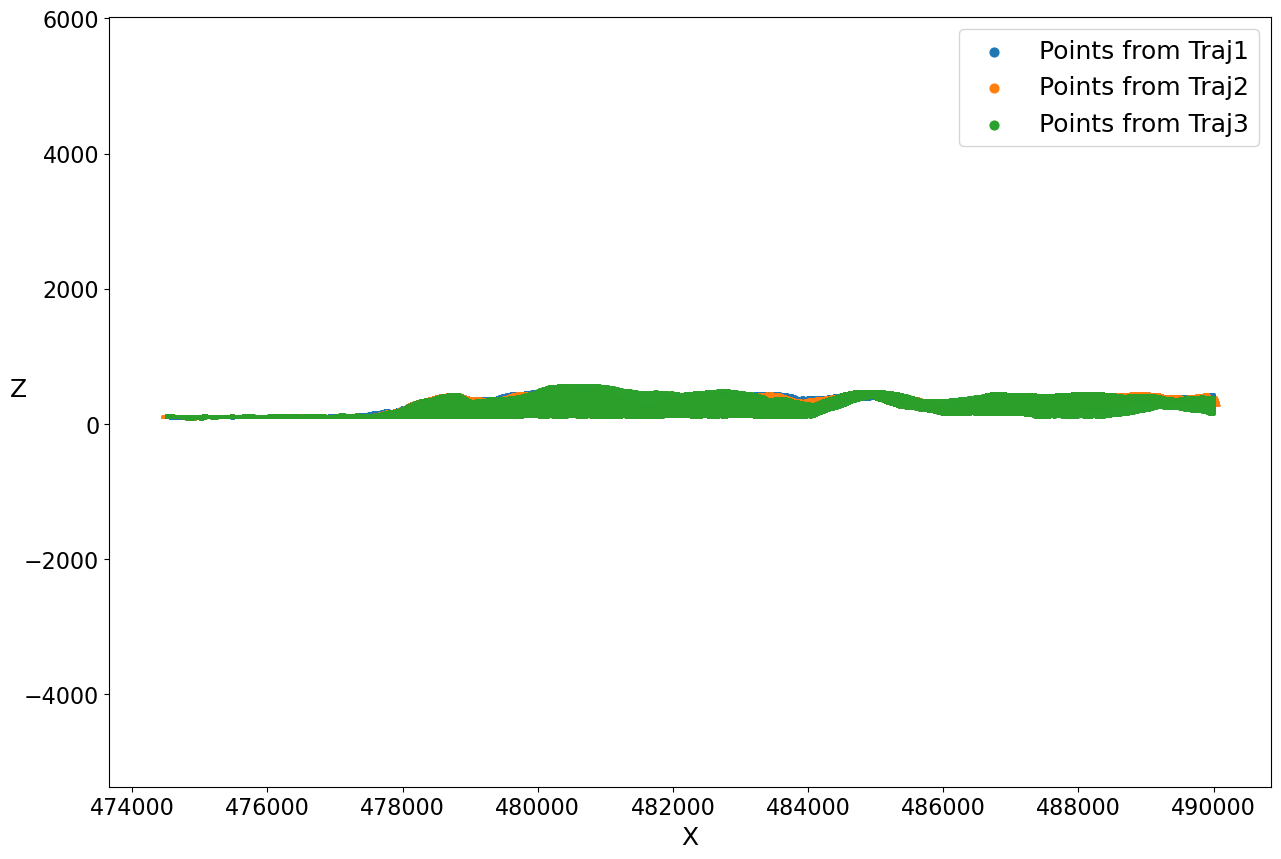

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

output_path = find_playback_dir(r"data\surveys\demo\als_hd_demo_tiff.xml")

print("Loading points from", output_path)

Traj1 = np.loadtxt(Path(output_path) / 'leg000_points.xyz')
Traj2= np.loadtxt(Path(output_path) / 'leg001_points.xyz')
Traj3= np.loadtxt(Path(output_path) / 'leg002_points.xyz')

# view from the side

fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(Traj1[:, 0], Traj1[:, 2], s=0.1, label="Points from Traj1") # select X and Z coordinates
ax.scatter(Traj2[:, 0], Traj2[:, 2], s=0.1, label="Points from Traj2")
ax.scatter(Traj3[:, 0], Traj3[:, 2], s=0.1, label="Points from Traj3")
plt.axis('equal')
ax.tick_params(labelsize=16)
plt.xlabel('X', fontsize=18)
plt.ylabel('Z', fontsize=18, rotation=0)
plt.legend(fontsize=18, markerscale=20)
plt.show()

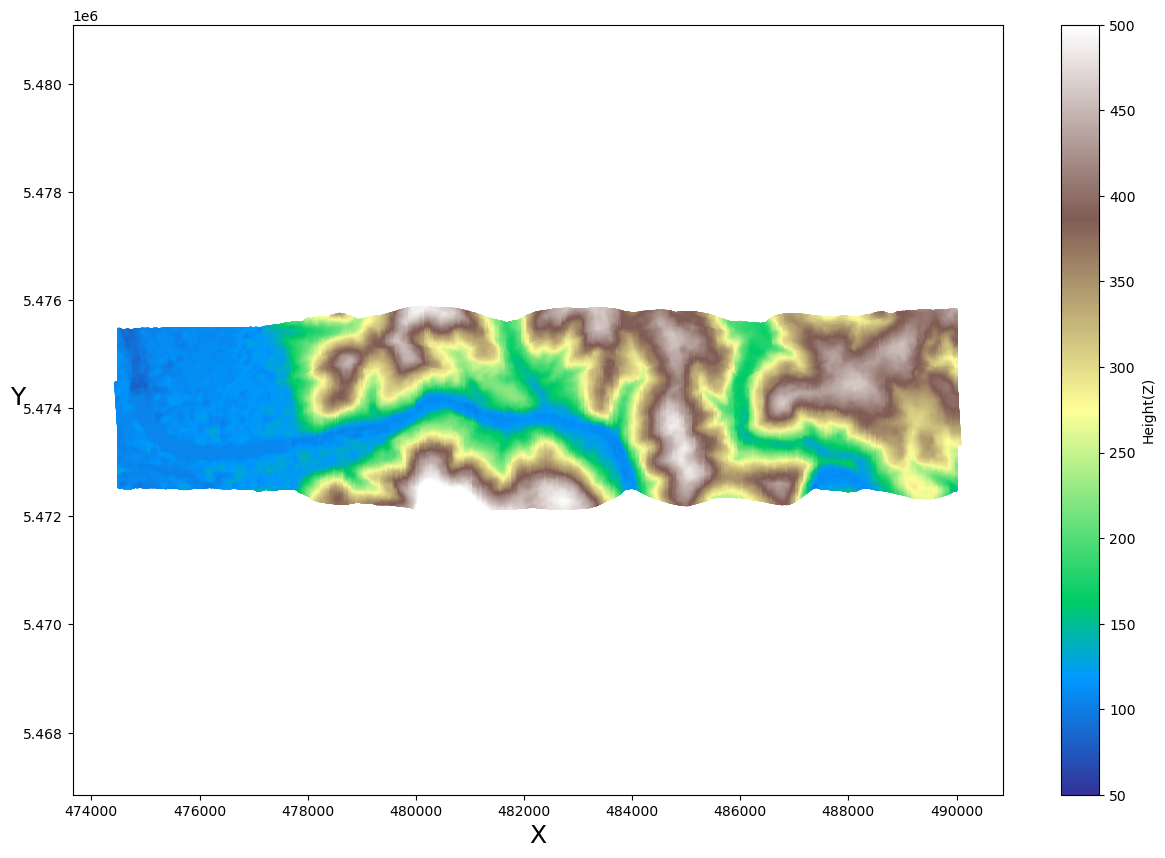

In [17]:
#view from above

fig, ax = plt.subplots(figsize=(15, 10))

plot1=ax.scatter(Traj1[:, 0], Traj1[:, 1], s=0.1, c=Traj1[:,2], cmap= 'terrain', vmin=50, vmax=500) # select X and y coordinates
plot2=ax.scatter(Traj2[:, 0], Traj2[:, 1], s=0.1, c=Traj2[:,2], cmap= 'terrain', vmin=50, vmax=500)
plot3=ax.scatter(Traj3[:, 0], Traj3[:, 1], s=0.1, c=Traj3[:,2], cmap= 'terrain', vmin=50, vmax=500)
plt.axis('equal')

plt.xlabel('X', fontsize=18)
plt.ylabel('Y', fontsize=18, rotation=0)

cbar = plt.colorbar(plot1)
cbar.set_label("Height(Z)")
plt.show()

In [20]:
# Section in direction of Y 

xmin, ymin, xmax, ymax = [480000, 5460000, 481000, 5480000]

section= Traj1[(Traj1[:, 0] > xmin) & 
                    (Traj1[:, 0] < xmax) & 
                    (Traj1[:, 1] > ymin) & 
                    (Traj1[:, 1] < ymax)]
section2= Traj2[(Traj2[:, 0] > xmin) & 
                    (Traj2[:, 0] < xmax) & 
                    (Traj2[:, 1] > ymin) & 
                    (Traj2[:, 1] < ymax)]
section3= Traj3[(Traj3[:, 0] > xmin) & 
                    (Traj3[:, 0] < xmax) & 
                    (Traj3[:, 1] > ymin) & 
                    (Traj3[:, 1] < ymax)]

(5471883.602495, 5476058.430405, 78.10835999999999, 604.74744)

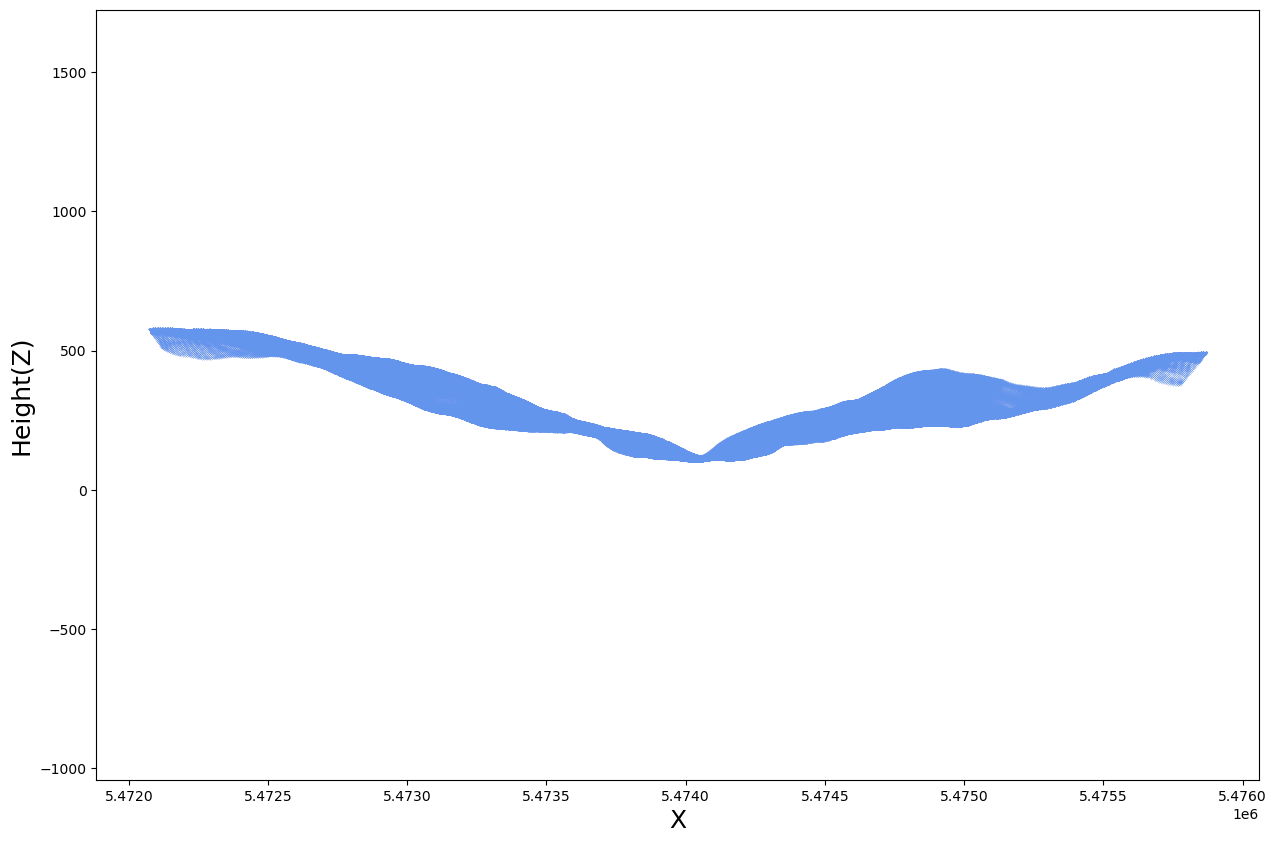

In [23]:
fig = plt.figure(figsize=(15,10))
# Axes3d axis onto mpl figure.
ax = fig.add_subplot()


ax.scatter(section[:, 1], section[:, 2], c="cornflowerblue", s=0.01)
ax.scatter(section2[:, 1], section2[:, 2], c="cornflowerblue", s=0.01)
ax.scatter(section3[:, 1], section3[:, 2], c="cornflowerblue", s=0.01)

plt.xlabel('X', fontsize=18)
plt.ylabel('Height(Z)', fontsize=18, rotation=90)
plt.axis('equal')